In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use("ggplot")
sns.set_theme(style="whitegrid", palette="Set2")

In [3]:
df = pd.read_csv('data\AirQualityUCI.csv', sep=';', decimal=',')
df = df.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1)
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [4]:
y = 'C6H6(GT)'

## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


#### Duplicates

In [6]:
df.duplicated().sum()

np.int64(113)

In [7]:
df = df.drop_duplicates(keep='first')

#### Missing Values

The description of dataset says that the null values are labelled with -200 value in the dataset

In [8]:
df = df.replace(-200, np.nan)

In [9]:
df.isna().sum()

Date                1
Time                1
CO(GT)           1684
PT08.S1(CO)       367
NMHC(GT)         8444
C6H6(GT)          367
PT08.S2(NMHC)     367
NOx(GT)          1640
PT08.S3(NOx)      367
NO2(GT)          1643
PT08.S4(NO2)      367
PT08.S5(O3)       367
T                 367
RH                367
AH                367
dtype: int64

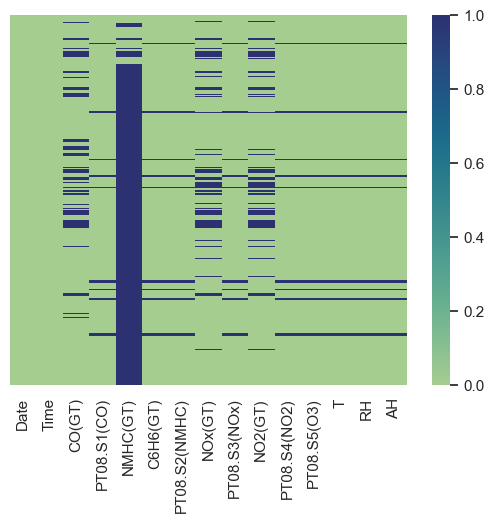

In [10]:
sns.heatmap(df.isna(),yticklabels=False,cmap='crest')
plt.show()

In [11]:
# NMHC column has a lot of null values. We can drop the column
df.drop(columns=['NMHC(GT)'],inplace=True)

In [12]:
# cols with missing values
cols = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)','PT08.S2(NMHC)', 'NOx(GT)', 
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)','PT08.S5(O3)', 'T', 
       'RH', 'AH']
for col in cols:
    df[col] = df[col].fillna(df[col].mean())

In [13]:
df = df.dropna()

In [14]:
df.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

#### Date

In [15]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')

# Optional: Extract useful features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday
df = df.drop(['Date'], axis=1)

#### Time

In [16]:
df['Hour'] = df['Time'].str.split('.').str[0].astype(int)
df = df.drop(['Time'], axis=1)

### Outliers

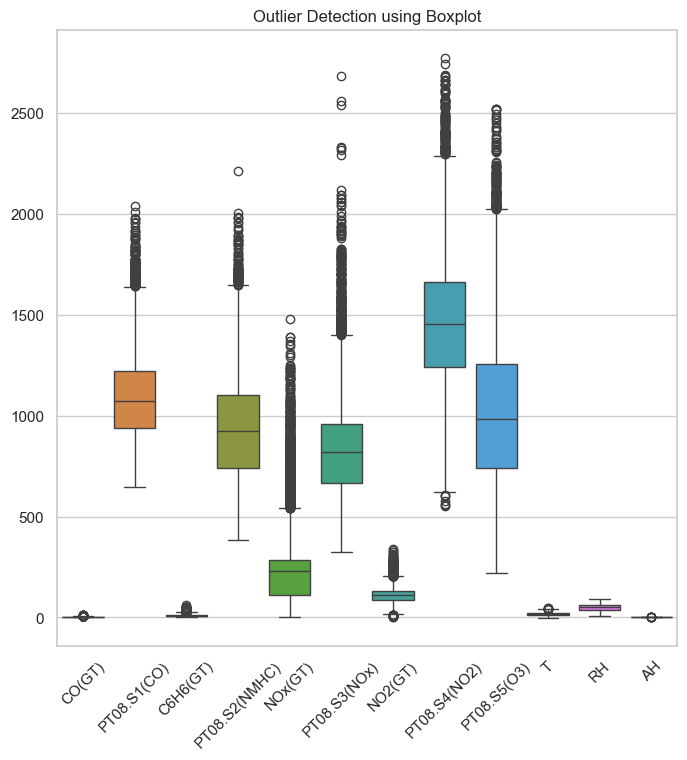

In [17]:
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(data=df[cols], ax=ax)
ax.set_title('Outlier Detection using Boxplot')
plt.xticks(rotation=45)
plt.show()

In [18]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

In [19]:
((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).sum()

CO(GT)            454
PT08.S1(CO)       145
C6H6(GT)          286
PT08.S2(NMHC)      91
NOx(GT)           778
PT08.S3(NOx)      278
NO2(GT)           380
PT08.S4(NO2)      131
PT08.S5(O3)       131
T                  10
RH                  0
AH                  7
Year             2247
Month               0
Day                 0
Weekday             0
Hour                0
dtype: int64

In [20]:
# replace outliers with median values
mask = ((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr)))
for i in mask.columns:
    df[i] = df[i].astype('float64')
    med = df[i].median()
    df.loc[mask[i], i] = med

In [21]:
((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).sum()

CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
Year             0
Month            0
Day              0
Weekday          0
Hour             0
dtype: int64

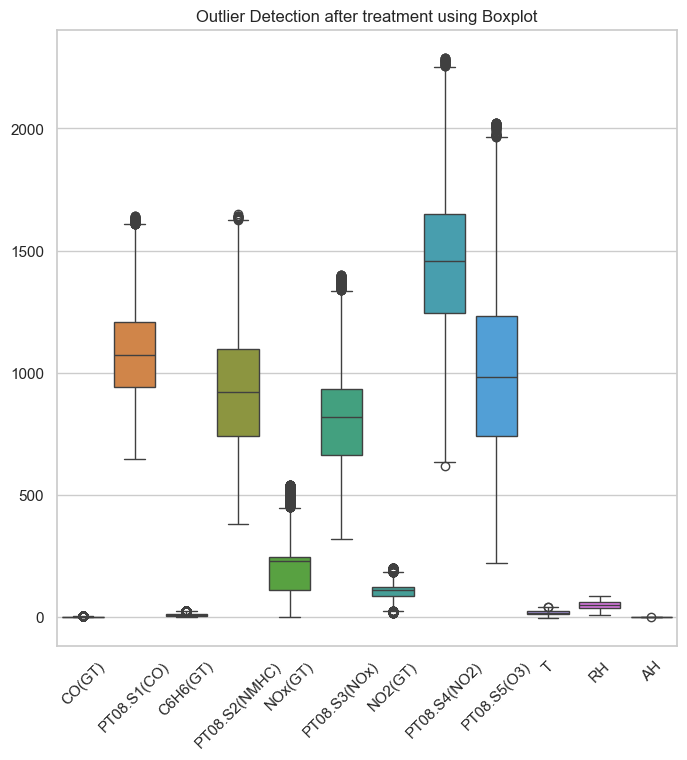

In [22]:
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(data=df[cols], ax=ax)
ax.set_title('Outlier Detection after treatment using Boxplot')
plt.xticks(rotation=45)
plt.show()

### Correlations

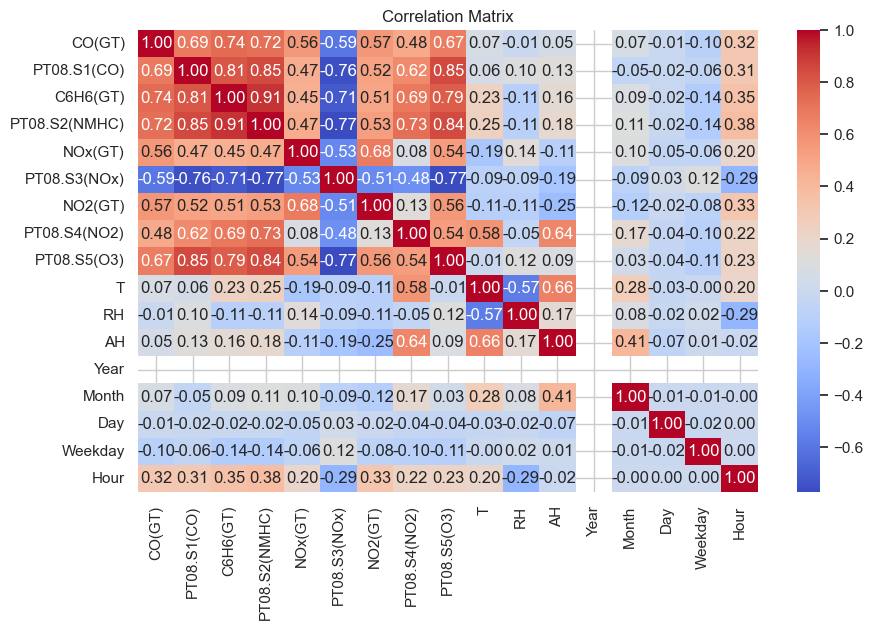

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=ax)
ax.set_title('Correlation Matrix')
plt.show()

I will by using `C6H6(GT)` as target feature.

`C6H6(GT)` is Ground Truth Benzene concentration (µg/m³).

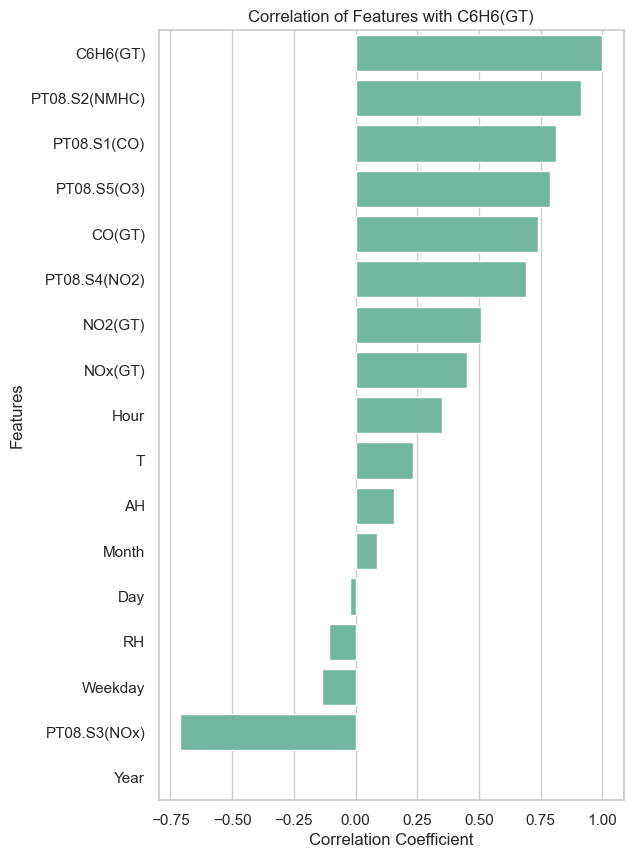

In [24]:
# Correlation With the Target Only
target_corr = df.corr()[y].sort_values(ascending=False)

plt.figure(figsize=(6, 10))
sns.barplot(x=target_corr.values, y=target_corr.index)
plt.title("Correlation of Features with C6H6(GT)")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.show()

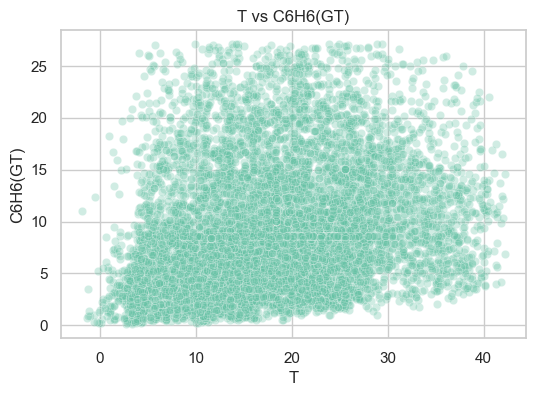

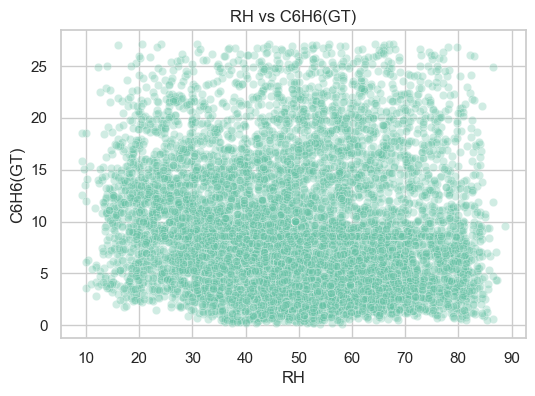

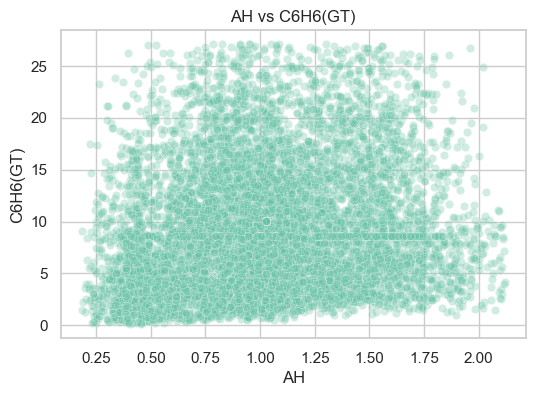

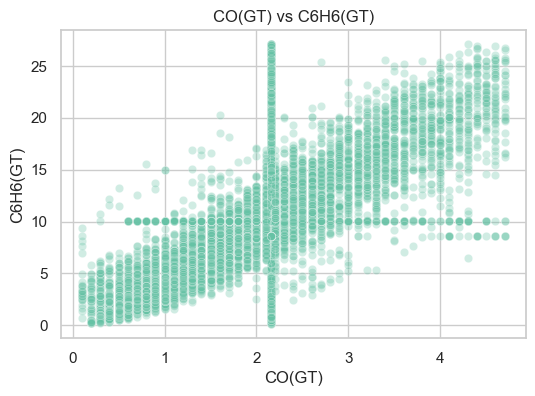

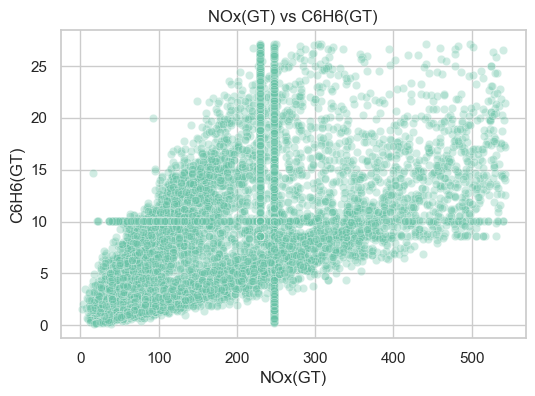

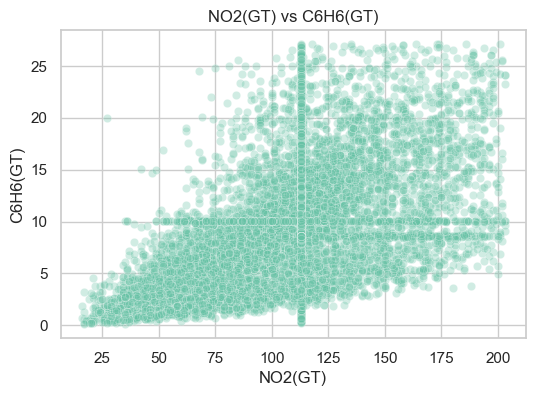

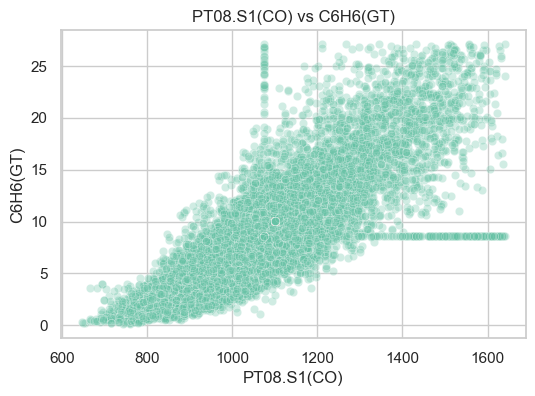

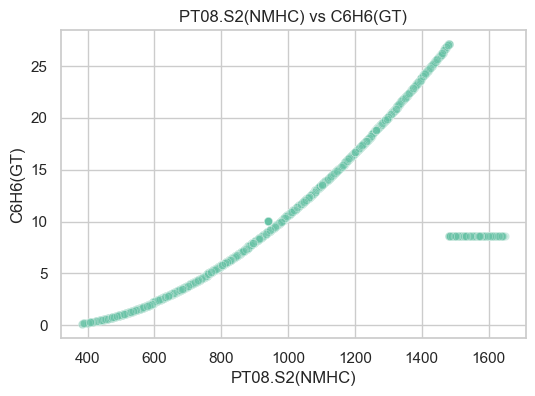

In [25]:
# Scatter Plots vs Target
features = ["T", "RH", "AH", "CO(GT)", "NOx(GT)", "NO2(GT)", "PT08.S1(CO)", "PT08.S2(NMHC)"]

for col in features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df["C6H6(GT)"], alpha=0.3)
    plt.title(f"{col} vs C6H6(GT)")
    plt.show()


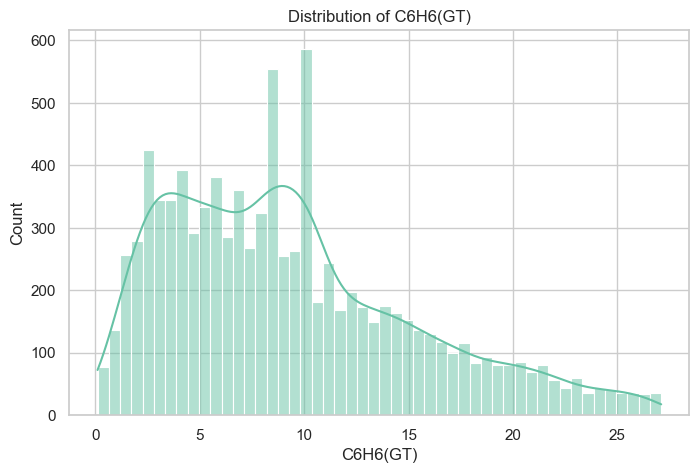

In [26]:
# Distribution of the Target Variable
plt.figure(figsize=(8,5))
sns.histplot(df["C6H6(GT)"], bins=50, kde=True)
plt.title("Distribution of C6H6(GT)")
plt.show()

In [27]:
# # pollution trends
# df["timestamp"] = pd.to_datetime(df[["Year", "Month", "Day", "Hour"]])

# plt.figure(figsize=(18,5))
# sns.lineplot(x=df["timestamp"], y=df["C6H6(GT)"])
# plt.title("C6H6(GT) Trend Over Time")
# plt.show()



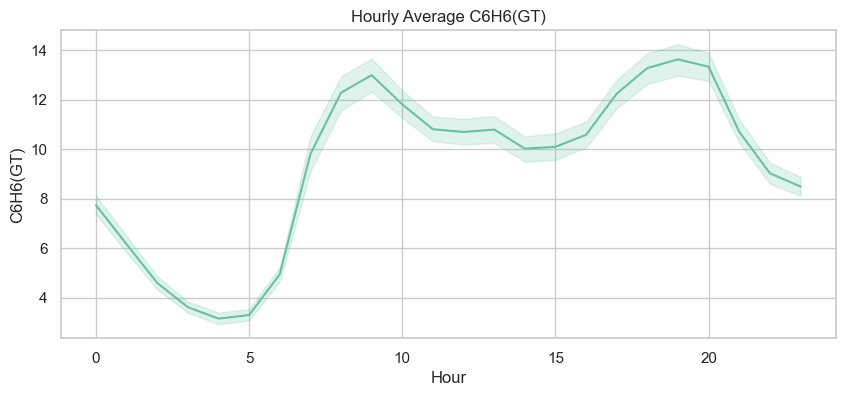

In [28]:
# Average Benzene by Hour
plt.figure(figsize=(10,4))
sns.lineplot(x=df["Hour"], y=df["C6H6(GT)"])
plt.title("Hourly Average C6H6(GT)")
plt.show()


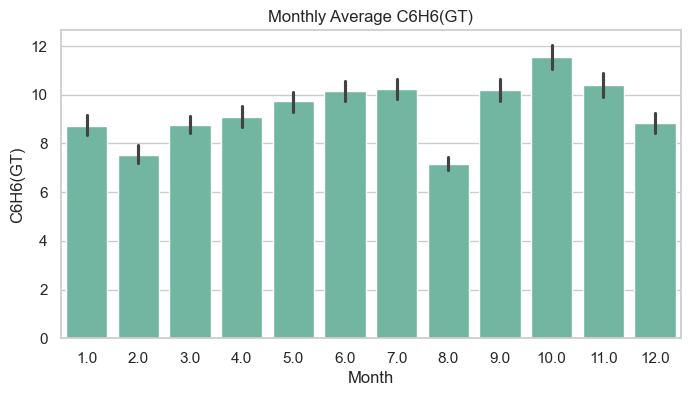

In [29]:
# Monthly Average Benzene
plt.figure(figsize=(8,4))
sns.barplot(x=df["Month"], y=df["C6H6(GT)"])
plt.title("Monthly Average C6H6(GT)")
plt.show()


### Feature Enineering

In [30]:
# Cyclical Encoding of Hour, Month, Weekday
def encode_cyclical(df, col, max_val):
    df[col + '_sin'] = np.sin(2 * np.pi * df[col] / max_val)
    df[col + '_cos'] = np.cos(2 * np.pi * df[col] / max_val)
    return df

df = encode_cyclical(df, 'Hour', 23)
df = encode_cyclical(df, 'Month', 12)
df = encode_cyclical(df, 'Weekday', 6)

df = df.drop(['Hour', 'Month', 'Weekday'], axis=1)

### TRAIN-TEST SPLIT

In [31]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=[y])
y = df[y]

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)  

In [32]:
# Scaling Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## Model Selection

In [33]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

In [34]:
def evaluete_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    return rmse, mae, r2

results = {}

models = {
    'LinearRegression' : LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBRegressor': XGBRegressor(n_estimators=100, random_state=42)
}

for name, model in models.items():
    rmse, mae, r2 = evaluete_model(model, X_train_scaled, y_train, X_val_scaled, y_val)
    results[name] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}

results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by='RMSE')
print(results_df)

                               RMSE       MAE        R2
RandomForestRegressor      0.030836  0.010594  0.999973
GradientBoostingRegressor  0.063736  0.044225  0.999886
XGBRegressor               0.907502  0.120841  0.976950
Ridge                      2.525170  1.234909  0.821530
LinearRegression           2.525285  1.234611  0.821513
Lasso                      2.546221  1.266297  0.818542


`RandomForestRegressor` achieved the lowest RMSE.

#### Parameters Tuning

In [35]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor(random_state=42)

param_dist = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [None, 5, 10, 20, 30, 50],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=20,
                                   scoring='neg_root_mean_squared_error',
                                   cv=3,                                   
                                   random_state=42,
                                   n_jobs=-1)
random_search.fit(X_train_scaled, y_train)

,estimator,RandomForestR...ndom_state=42)
,param_distributions,"{'max_depth': [None, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,n_iter,20
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [36]:
best_rf = random_search.best_estimator_

y_val_pred = best_rf.predict(X_val_scaled)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
rmse

np.float64(0.03844997632103477)

In [42]:
random_search.best_params_

{'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_depth': 30}

In [37]:
y_test_pred = best_rf.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Test RMSE:", test_rmse)

Test RMSE: 5.929349953097463


c:\Users\mahmo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [38]:
X_final_train = pd.concat([X_train, X_val])
y_final_train = pd.concat([y_train, y_val])

best_rf.fit(X_final_train, y_final_train)

,n_estimators,500
,criterion,'squared_error'
,max_depth,30
,min_samples_split,10
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [43]:
X_final_train.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)',
       'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'Year',
       'Day', 'Hour_sin', 'Hour_cos', 'Month_sin', 'Month_cos', 'Weekday_sin',
       'Weekday_cos'],
      dtype='object')

In [39]:
y_test_pred = best_rf.predict(X_test)
final_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
final_mae = mean_absolute_error(y_test, y_test_pred)
final_r2 = r2_score(y_test, y_test_pred)


In [41]:
print(f"Test RMSE: {final_rmse:.2f}")
print(f"Test MAE: {final_mae:.2f}")
print(f"Test R2: {final_r2:.2f}")

Test RMSE: 0.57
Test MAE: 0.03
Test R2: 0.99


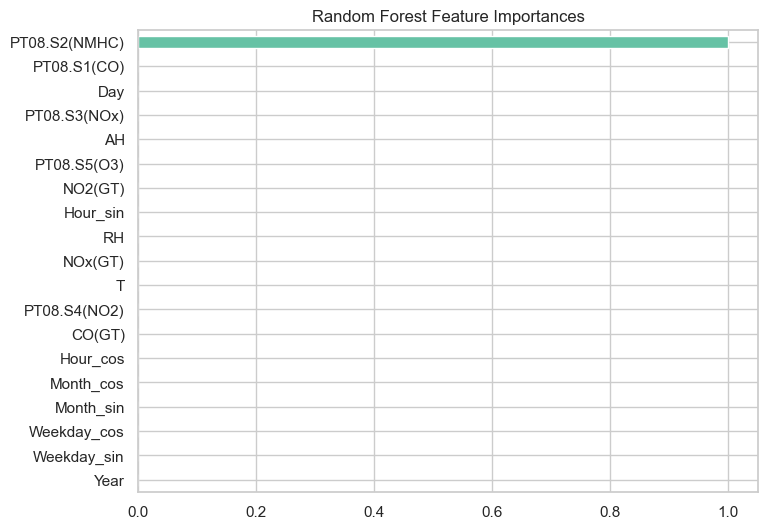

In [40]:
# Feature Importance
feature_importances = pd.Series(best_rf.feature_importances_, index=X_final_train.columns)
feature_importances.sort_values(ascending=True).plot(kind='barh', figsize=(8,6))
plt.title("Random Forest Feature Importances")
plt.show()